## Домашняя работа 4. 

Максимальный балл за задание - 10.

## Данные


В этой домашней работе мы будем обучать модели машинного обучения, ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week
 
Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

## Метрика качества

В задании мы будем оценивать качество моделей с помощью метрики AUC-ROC.

## Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, регуляризация в линейной модели или максимальная глубина решающего дерева). Каждая модель обычно имеет множество гиперпараметров, и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется). Однако в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать: 

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение (`train`), валидация (`validation`) и контроль (`test`). Валидационную подвыборку используют для сравнения моделей, а `test` — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://en.wikipedia.org/wiki/Cross-validation_(statistics). Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку можно делать более разреженной, перебирая меньше значений каждого параметра; однако, надо не забывать, что в таком случае можно пропустить хорошую комбинацию параметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
  - параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации параметров, а небольшое число случайно выбранных.

## Задание 

Загрузите набор данных *data.adult.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [8]:
import sys
sys.version

   age  workclass  fnlwgt     education  education-num      marital-status  \
0   34  Local-gov  284843       HS-grad              9       Never-married   
1   40    Private  190290  Some-college             10            Divorced   
2   36  Local-gov  177858     Bachelors             13  Married-civ-spouse   
3   22    Private  184756  Some-college             10       Never-married   
4   47    Private  149700     Bachelors             13  Married-civ-spouse   

        occupation   relationship   race     sex  capital-gain  capital-loss  \
0  Farming-fishing  Not-in-family  Black    Male           594             0   
1            Sales  Not-in-family  White    Male             0             0   
2   Prof-specialty      Own-child  White    Male             0             0   
3            Sales      Own-child  White  Female             0             0   
4     Tech-support        Husband  White    Male         15024             0   

   hours-per-week >50K,<=50K  
0              60  

Иногда в данных встречаются пропуски. Как задаются пропуски обычно либо прописывается в описании к данным, либо просто на месте пропуска после чтения данных оказывается значение numpy.nan. Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "?". 

**Задание 1 (0.5 балла)** Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.

In [14]:


# в данном случае мы посчитали по столбцам количество строчек, содержащих символ "?"
df_init.apply(pd.value_counts).filter(like='?', axis=0)
# мы видим, что есть 2 переменные ["workclass", "occupation"], содержащие 929 и 933 пропусков соответственно

C:\Users\azhoh\AppData\Local\Temp\ipykernel_12040\3650533760.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df_init.apply(pd.value_counts).filter(like='?', axis=0)
C:\Users\azhoh\AppData\Local\Temp\ipykernel_12040\3650533760.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df_init.apply(pd.value_counts).filter(like='?', axis=0)
C:\Users\azhoh\AppData\Local\Temp\ipykernel_12040\3650533760.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df_init.apply(pd.value_counts).filter(like='?', axis=0)
C:\Users\azhoh\AppData\Local\Temp\ipykernel_12040\3650533760.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df_init.apply(pd.value_c

TypeError: '<' not supported between instances of 'str' and 'int'

In [1]:
# записываем датасет без пропущенных значений в переменную df_clean
df_clean = df_init.drop(["workclass", "occupation"], axis=1)
df_clean

NameError: name 'df_init' is not defined

Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем: 

 - Выделите целевую переменную в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату.
 - Обратите внимание, что не все признаки являются вещественными. В начале мы будем работать только с вещественными признаками. Выделите их отдельно.

In [17]:
import pandas as pd

# преобразуем переменную Y к бинарному формату, где 1 - доход свыше 50к, 0 - доход до 50к включительно
# и записываем в переменную df_Y
df_Y = pd.get_dummies(df_clean, columns=['>50K,<=50K'])['>50K,<=50K_>50K'].rename("Y")
df_Y

0        False
1        False
2        False
3        False
4         True
         ...  
16275    False
16276     True
16277    False
16278    False
16279     True
Name: Y, Length: 16280, dtype: bool

In [18]:
df_X_numerical = df_clean[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
df_X_numerical

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,34,284843,9,594,0,60
1,40,190290,10,0,0,40
2,36,177858,13,0,0,40
3,22,184756,10,0,0,30
4,47,149700,13,15024,0,40
...,...,...,...,...,...,...
16275,25,514716,13,0,0,40
16276,32,207668,13,15024,0,45
16277,27,104457,13,0,0,40
16278,59,268700,9,0,0,40


## Обучение классификаторов на вещественных признаках

В данном разделе необходимо будет работать только с вещественными признаками и целевой переменной.

В начале посмотрим как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 5 алгоритмов:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
 - [GradientBoosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 - SGD Linear Classifier — оптимизируемая функция (*loss*)
 
Остальные параметры оставляйте в значениях по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). В качестве схемы кросс-валидации используйте 5-fold cv, которую можно задать с помощью класса [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

**Задание 2 (1 балл)** Для каждого из первых трех алгоритмов подберите оптимальные значения указанных гиперпараметров. Для каждого из этих алгоритмов постройте график среднего качества по кросс-валидации при заданном значении гиперпараметра, на котором также отобразите доверительный интервал [m-std, m+std], где m - среднее, std - стандартное отклонение.

Best parameters: {'n_neighbors': 5}
Best score: 0.6443971580603648


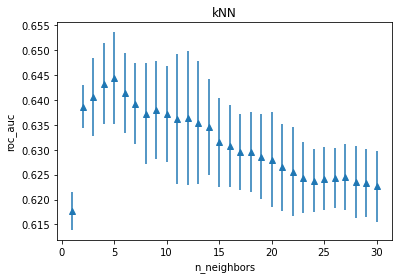

In [39]:
# kNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

kf = KFold(n_splits=5, shuffle=False)

knn_model = KNeighborsClassifier(n_neighbors=3)

# оптимизируем число соседей в диапазоне от 1 до 30 включительно

params_knn = {
    'n_neighbors': list(range(1, 31))
}

grid_knn = GridSearchCV(knn_model, param_grid=params_knn, cv=kf, 
                          scoring='roc_auc').fit(df_X_numerical, df_Y)

print('Best parameters:', grid_knn.best_params_)
print('Best score:', grid_knn.best_score_)

plt.errorbar(list(grid_knn.cv_results_['param_n_neighbors']), 
             list(grid_knn.cv_results_['mean_test_score']), 
             list(grid_knn.cv_results_['std_test_score']), 
             linestyle='None',
             marker='^')

plt.title('kNN')
plt.xlabel('n_neighbors')
plt.ylabel('roc_auc')
plt.show()

Best parameters: {'max_depth': 7}
Best score: 0.8450480317978357


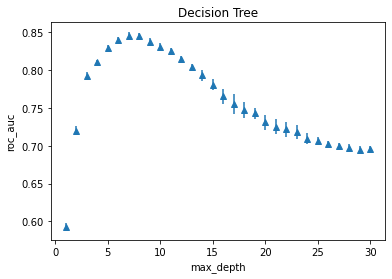

In [37]:
# Decision Tree

from sklearn import tree

tree_model = tree.DecisionTreeClassifier()

# оптимизируем глубину дерева от 1 до 30 включительно

params_tree = {
    'max_depth': list(range(1, 21))
}

grid_tree = GridSearchCV(tree_model, param_grid=params_tree, cv=kf, 
                          scoring='roc_auc').fit(df_X_numerical, df_Y)

print('Best parameters:', grid_tree.best_params_)
print('Best score:', grid_tree.best_score_)

plt.errorbar(list(grid_tree.cv_results_['param_max_depth']), 
             list(grid_tree.cv_results_['mean_test_score']), 
             list(grid_tree.cv_results_['std_test_score']), 
             linestyle='None',
             marker='^')

plt.title('Decision Tree')
plt.xlabel('max_depth')
plt.ylabel('roc_auc')
plt.show()

c:\Users\iljag\anaconda3\envs\homework\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\iljag\anaconda3\envs\homework\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\iljag\anaconda3\envs\homework\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\iljag\anaconda3\envs\homework\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\U

Best parameters: {'loss': 'hinge'}
Best score: 0.6169513387917519


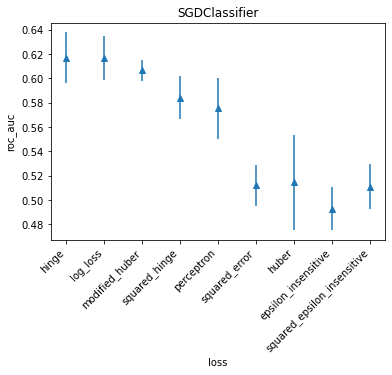

In [19]:
# SGDClassifier

from sklearn.linear_model import SGDClassifier

SGD_model = SGDClassifier()

# ищем оптимальную функцию потерь (взяты из документации)

params_SGD = {
    'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
}

grid_SGD = GridSearchCV(SGD_model, param_grid=params_SGD, cv=kf, 
                          scoring='roc_auc').fit(df_X_numerical, df_Y)

print('Best parameters:', grid_SGD.best_params_)
print('Best score:', grid_SGD.best_score_)

plt.errorbar(list(grid_SGD.cv_results_['param_loss']), 
             list(grid_SGD.cv_results_['mean_test_score']), 
             list(grid_SGD.cv_results_['std_test_score']), 
             linestyle='None',
             marker='^')

plt.title('SGDClassifier')
plt.xlabel('loss')
plt.ylabel('roc_auc')
plt.xticks(rotation=45, ha='right')
plt.show()

Промежуточные выводы по графикам и моделям:
- Параметры метода ближайших соседей и деревьев решений достигают оптимума при определенном значении, после чего метрика roc_auc начинает падать
- В случае стохастического градиентного спуска наиболее оптимальной оказалась функция потерь "hinge" (которая используется алгоритмом по-дефолту)

Что вы можете сказать о получившихся графиках?

**Задание 3 (0.5 балла)** Также подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев, так что при увеличении этого гиперпараметра его качество не будет становиться хуже. Поэтому подберите такое количество деревьев, при котором качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте это количество деревьев.

Best parameters: {'n_estimators': 1500}
Best score: 0.8252735829329684


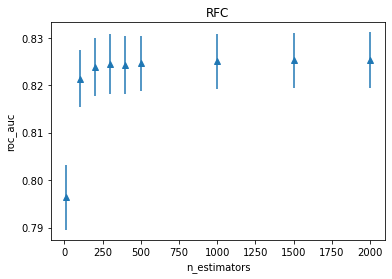

In [20]:
# RFC

from sklearn.ensemble import RandomForestClassifier

RFC_model = RandomForestClassifier(random_state=0)

# оптимизируем кол-во деревьев
# к сожалению не очень поняла, как оптимизировать по полю estimators_, поэтому использую менее эффективный алгоритм

params_RFC = {
    'n_estimators': (10, 100, 200, 300, 400, 500, 1000, 1500, 2000)
}

grid_RFC = GridSearchCV(RFC_model, param_grid=params_RFC, cv=kf, 
                          scoring='roc_auc').fit(df_X_numerical, df_Y)

print('Best parameters:', grid_RFC.best_params_)
print('Best score:', grid_RFC.best_score_)

plt.errorbar(list(grid_RFC.cv_results_['param_n_estimators']), 
             list(grid_RFC.cv_results_['mean_test_score']), 
             list(grid_RFC.cv_results_['std_test_score']), 
             linestyle='None',
             marker='^')

plt.title('RFC')
plt.xlabel('n_estimators')
plt.ylabel('roc_auc')
plt.show()

Визуально анализ показывает, что при кол-ве деревьев равном 300 функция roc_auc не возрастает значимым образом.

**Задание 4 (0.5 балла)** Подберём число деревьев (*n_estimators*) в алгоритме GradientBoosting. Мы знаем, что ошибка бустинга на тестовых данных, как правило, имеет U-образную форму, то есть сначала уменьшается, а при достижении некоторого числа деревьев начинает расти. Нарисуйте график ошибки в зависимости от числа деревьев. Подберите n_estimators, соответствующий минимуму ошибки.

Best parameters: {'n_estimators': 200}
Best score: 0.8701624781914138


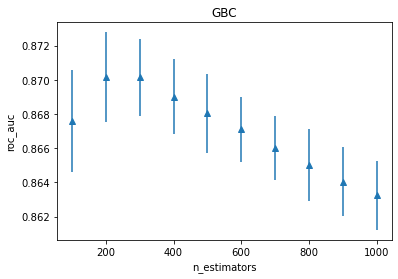

In [24]:
# GBC

from sklearn.ensemble import GradientBoostingClassifier

GBC_model = GradientBoostingClassifier(random_state=0)

# оптимизируем кол-во деревьев (в диапазоне от 100 до 1000 с шагом в 100)

params_GBC = {
    'n_estimators': list(range(100, 1001, 100))
}

grid_GBC = GridSearchCV(GBC_model, param_grid=params_GBC, cv=kf, 
                          scoring='roc_auc').fit(df_X_numerical, df_Y)

print('Best parameters:', grid_GBC.best_params_)
print('Best score:', grid_GBC.best_score_)

plt.errorbar(list(grid_GBC.cv_results_['param_n_estimators']), 
             list(grid_GBC.cv_results_['mean_test_score']), 
             list(grid_GBC.cv_results_['std_test_score']), 
             linestyle='None',
             marker='^')

plt.title('GBC')
plt.xlabel('n_estimators')
plt.ylabel('roc_auc')
plt.show()

При обучении алгоритмов стоит обращать внимание не только на качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это как-то могло повлиять на качество давайте посмотрим на сами признаки.

**Задание 5 (0.5 балла)** Постройте гистограммы для признаков *age*, *fnlwgt*, *capital-gain*. Глядя на получившиеся графики в чем заключается особенность данных? На какие алгоритмы это может повлиять? Может ли масшитабирование повлиять на работу этих алгоритмов?

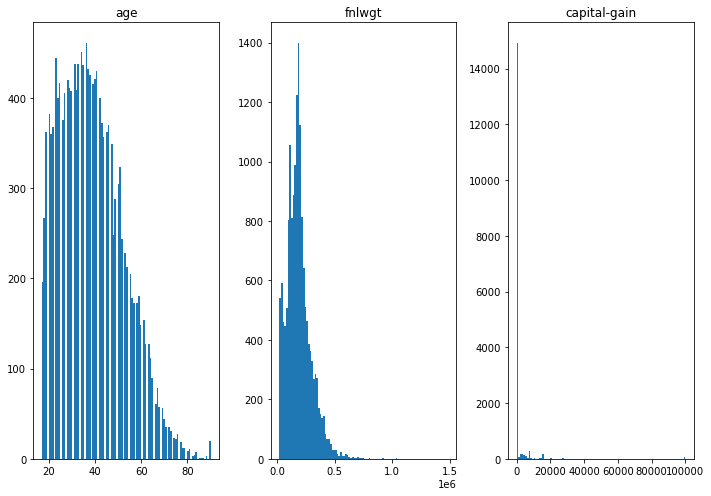

In [34]:
fig, axs = plt.subplots(1, 3, tight_layout=True)

axs[0].hist(df_X_numerical['age'], bins=100)
axs[0].set_title('age')
axs[1].hist(df_X_numerical['fnlwgt'], bins=100)
axs[1].set_title('fnlwgt')
axs[2].hist(df_X_numerical['capital-gain'], bins=100)
axs[2].set_title('capital-gain')

fig.set_figheight(7)
fig.set_figwidth(10)

plt.show()

Явная особенность переменной 'capital-gain' заключается в большом количестве нулевых значений, а также в наличии выбросов (большая часть данных менее 20,000, но есть значение около 100,000)
Переменная fnlwgt напоминает лог-нормальное распределение и также обладает выбросами
Переменная age (по очевидным причинам) является наиболее "стабильной" - с ярко выраженным распределением, напоминающее нормальное (но с длинным "хвостом" справа), и с отсутствием выбросов
Очевидным образом одним из самых чувствительных алгоритмов к выбросам и неравномерностям в данных является метод ближайших соседей, который считает расстояния между точками в абсолютных величинах (что заметно по низкому качеству значения roc_auc относительно большинства других алгоритмов).
Стохастический градиентный спуск (по которому мы также получили низкое качество моделей) тоже является чувствительным к выбросам, см.: https://medium.com/bayshore-intelligence-solutions/why-is-stochastic-gradient-descent-2c17baf016de

Масштабирование признаков можно выполнить, например, одним из следующих способов способами:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 
**Задание 6 (1 балл)** Масштабируйте все вещественные признаки одним из указанных способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# transform data
scaled_X_numerical = scaler.fit_transform(df_X_numerical)
scaled_X_numerical

array([[0.23287671, 0.18120681, 0.53333333, 0.00594006, 0.        ,
        0.60204082],
       [0.31506849, 0.11668326, 0.6       , 0.        , 0.        ,
        0.39795918],
       [0.26027397, 0.10819959, 0.8       , 0.        , 0.        ,
        0.39795918],
       ...,
       [0.1369863 , 0.05811029, 0.8       , 0.        , 0.        ,
        0.39795918],
       [0.57534247, 0.17019073, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.21917808, 0.0271468 , 0.8       , 0.        , 0.43663912,
        0.44897959]])

Best parameters: {'n_neighbors': 30}
Best score: 0.8293088314184383


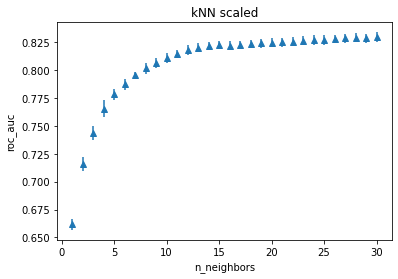

In [40]:
# kNN (scaled)

grid_knn_scaled = GridSearchCV(knn_model, param_grid=params_knn, cv=kf, 
                          scoring='roc_auc').fit(scaled_X_numerical, df_Y)

print('Best parameters:', grid_knn_scaled.best_params_)
print('Best score:', grid_knn_scaled.best_score_)

plt.errorbar(list(grid_knn_scaled.cv_results_['param_n_neighbors']), 
             list(grid_knn_scaled.cv_results_['mean_test_score']), 
             list(grid_knn_scaled.cv_results_['std_test_score']), 
             linestyle='None',
             marker='^')

plt.title('kNN scaled')
plt.xlabel('n_neighbors')
plt.ylabel('roc_auc')
plt.show()

Best parameters: {'max_depth': 7}
Best score: 0.8451949774666453


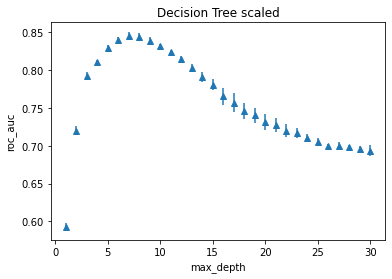

In [41]:
# Tree (scaled)

grid_tree_scaled = GridSearchCV(tree_model, param_grid=params_tree, cv=kf, 
                          scoring='roc_auc').fit(scaled_X_numerical, df_Y)

print('Best parameters:', grid_tree_scaled.best_params_)
print('Best score:', grid_tree_scaled.best_score_)

plt.errorbar(list(grid_tree_scaled.cv_results_['param_max_depth']), 
             list(grid_tree_scaled.cv_results_['mean_test_score']), 
             list(grid_tree_scaled.cv_results_['std_test_score']), 
             linestyle='None',
             marker='^')

plt.title('Decision Tree scaled')
plt.xlabel('max_depth')
plt.ylabel('roc_auc')
plt.show()

c:\Users\iljag\anaconda3\envs\homework\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\iljag\anaconda3\envs\homework\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\iljag\anaconda3\envs\homework\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\iljag\anaconda3\envs\homework\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\U

Best parameters: {'loss': 'modified_huber'}
Best score: 0.8283066036516029


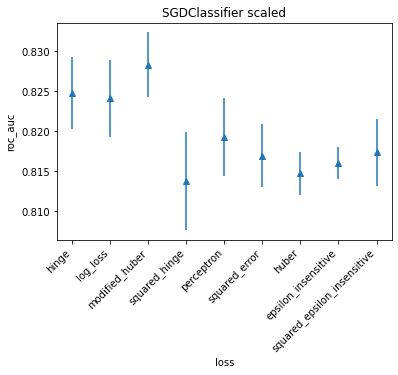

In [42]:
# SGD (scaled)

grid_SGD_scaled = GridSearchCV(SGD_model, param_grid=params_SGD, cv=kf, 
                          scoring='roc_auc').fit(scaled_X_numerical, df_Y)

print('Best parameters:', grid_SGD_scaled.best_params_)
print('Best score:', grid_SGD_scaled.best_score_)

plt.errorbar(list(grid_SGD_scaled.cv_results_['param_loss']), 
             list(grid_SGD_scaled.cv_results_['mean_test_score']), 
             list(grid_SGD_scaled.cv_results_['std_test_score']), 
             linestyle='None',
             marker='^')

plt.title('SGDClassifier scaled')
plt.xlabel('loss')
plt.ylabel('roc_auc')
plt.xticks(rotation=45, ha='right')
plt.show()

Best parameters: {'n_estimators': 1500}
Best score: 0.8252661635445795


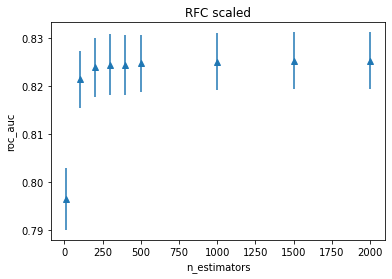

In [43]:
# RFC (scaled)

grid_RFC_scaled = GridSearchCV(RFC_model, param_grid=params_RFC, cv=kf, 
                          scoring='roc_auc').fit(scaled_X_numerical, df_Y)

print('Best parameters:', grid_RFC_scaled.best_params_)
print('Best score:', grid_RFC_scaled.best_score_)

plt.errorbar(list(grid_RFC_scaled.cv_results_['param_n_estimators']), 
             list(grid_RFC_scaled.cv_results_['mean_test_score']), 
             list(grid_RFC_scaled.cv_results_['std_test_score']), 
             linestyle='None',
             marker='^')

plt.title('RFC scaled')
plt.xlabel('n_estimators')
plt.ylabel('roc_auc')
plt.show()

Best parameters: {'n_estimators': 200}
Best score: 0.870224959990264


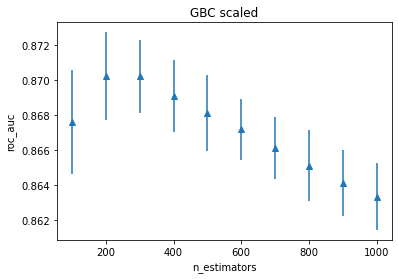

In [44]:
# GBC (scaled)

grid_GBC_scaled = GridSearchCV(GBC_model, param_grid=params_GBC, cv=kf, 
                          scoring='roc_auc').fit(scaled_X_numerical, df_Y)

print('Best parameters:', grid_GBC_scaled.best_params_)
print('Best score:', grid_GBC_scaled.best_score_)

plt.errorbar(list(grid_GBC_scaled.cv_results_['param_n_estimators']), 
             list(grid_GBC_scaled.cv_results_['mean_test_score']), 
             list(grid_GBC_scaled.cv_results_['std_test_score']), 
             linestyle='None',
             marker='^')

plt.title('GBC scaled')
plt.xlabel('n_estimators')
plt.ylabel('roc_auc')
plt.show()

Как и ожидалось, существенным образом выросло качество метода ближайших соседей и стохастического градиентного спуска - алгоритмов с наименьшим качеством в первой итерации модели, которые наиболее чувствительны к выбросам и разбросу данных.
При этом сильно изменились и оптимальные гипермараметры указанных двух алгоритмов.

Изменилось ли качество у некоторых алгоритмов?

**Задание 7 (1.25 балла)** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае: 
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)
 - GradientBoosting — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)
 - SGDClassifier — оптимизируемая функция (*loss*) и *penalty*
 
Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели"

In [ ]:
#your code here

Какой из алгоритмов имеет наилучшее качество? 

**Задание 8 (0.5 балла)** Сравните алгоритмы с точки зрения времени обучения. Обучение какого из алгоритмов работает дольше всего и, как вы думаете, почему?

Базируясь на переборе одного параметра наиболее долго обучались случайный лес и градиентный бустинг, что обусловлено тем, что данный алгоритмы относятся к классу ансамблевых.

## Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**Задание 9 (0.5 балла)** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) из sklearn).

In [48]:
df_with_dummies = pd.get_dummies(data=df_clean, columns=['education',
                                                         'marital-status',
                                                         'sex',
                                                        'relationship',
                                                        'race']).drop('>50K,<=50K', axis=1)

df_with_dummies

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,education_10th,education_11th,education_12th,education_1st-4th,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,34,284843,9,594,0,60,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,40,190290,10,0,0,40,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,36,177858,13,0,0,40,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,22,184756,10,0,0,30,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,47,149700,13,15024,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,25,514716,13,0,0,40,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
16276,32,207668,13,15024,0,45,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16277,27,104457,13,0,0,40,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
16278,59,268700,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Задание 10 (0.5 балла)** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами из предыдущего пункта. Дало ли добавление новых признаков прирост качества? Измеряйте качество как и раньше используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

In [ ]:
#your code here

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

## Поиск новых полезных признаков

**Задание 11 (1.25 балла).** Попробуем улучшить качество модели, добавив в неё новые информативные признаки. Поступим так же, как действовали на [семинаре](https://github.com/Murcha1990/ML_Econom_2021-2022/blob/main/Семинары/Семинар%207/Seminar7.ipynb):
* добавьте к модели полиномиальных признаков степени 2 (для создания полиномиальных признаков используйте только исходные числовые признаки)
* затем снизьте размерность с помощью:
a) фильтрационных методов
b) жадного отбора признаков (RFE)
с) встроенного в модель метода отбора признаков.

Для каждого пункта выше выберите один метод и подберите для него оптимальные гиперпараметры, а также количество финальных признаков (по кросс-валидации).

* Затем можно добавить к модели закодированные в предыдущем пункте категориальные признаки.

Позволил ли этот подход улучшить качество моделей? 

In [ ]:
#your code here

## Смешивание моделей

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказания путем смешивания подобных разных моделей. Давайте посмотрим, действительно ли это дает прирост в качестве.

Выберите из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) \cdot \alpha + clf_2(x) \cdot (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**Задание 12 (1 балл)** Подберите по сетке от 0 до 1 $\alpha$ для этого классификатора с помощью 5-Fold CV и постройте график качества в зависимости от $\alpha$ (аналогичный графику в разделе "Обучение классификаторов и оценка качества"). Дал ли этот подход прирост к качеству по сравнению с моделями ранее?

In [ ]:
#your code here

## Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей хотелось бы сравнить их между собой. Для этого можно построить "ящик с усами" (диаграму размаха). Для этого можно воспользоваться библиотекой [matplotlib](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) или [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

**Задание 13 (1 балл)** Для каждого типа классификатора (kNN, DecisionTree, RandomForest, SGD classifier), а так же смешанной модели выберите тот, которых давал наилучшее качество на кросс-валидации (с учетом подобранных гиперпараметров) и постройте диаграмму размаха (все классификаторы должны быть изображены на одном графике).
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

In [ ]:
#your code here